<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Challenge" data-toc-modified-id="Challenge-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Challenge</a></span></li><li><span><a href="#Model-Validation:--3rd-Order-Plant" data-toc-modified-id="Model-Validation:--3rd-Order-Plant-2"><span class="toc-item-num">2&nbsp;&nbsp;</span><em>Model Validation:</em>  3rd Order Plant</a></span></li><li><span><a href="#Controller-Design:-Block-Diagram" data-toc-modified-id="Controller-Design:-Block-Diagram-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><em>Controller Design:</em> Block Diagram</a></span></li><li><span><a href="#Controller-Design:-Root-Locus-Sketch" data-toc-modified-id="Controller-Design:-Root-Locus-Sketch-4"><span class="toc-item-num">4&nbsp;&nbsp;</span><em>Controller Design:</em> Root Locus Sketch</a></span></li><li><span><a href="#Controller-Design:-Select-Gains-with-Root-Locus" data-toc-modified-id="Controller-Design:-Select-Gains-with-Root-Locus-5"><span class="toc-item-num">5&nbsp;&nbsp;</span><em>Controller Design:</em> Select Gains with Root Locus</a></span><ul class="toc-item"><li><span><a href="#Arduino-Code-Update" data-toc-modified-id="Arduino-Code-Update-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Arduino Code Update</a></span></li></ul></li><li><span><a href="#Controller-Validation:-1st-and-3rd-Order-Plant" data-toc-modified-id="Controller-Validation:-1st-and-3rd-Order-Plant-6"><span class="toc-item-num">6&nbsp;&nbsp;</span><em>Controller Validation:</em> 1st and 3rd Order Plant</a></span></li></ul></div>

## Challenge

Having developed a plant transfer function for the **MOTOR-SPRING-LOAD** configuration, you are being asked to improve its closed loop performance by reducing its settling time while achieving perfect tracking.  However, this will require you to increase the complexity of your controller.  Your new controller will need a settling time 1.5-2 times faster than the open loop system.  Additionally, the slowest eigenvalues (or the "dominant" eigenvalue pair) should produce a damping ratio of 0.707.

## *Model Validation:*  3rd Order Plant
**Begin by including the validation of your plant model in the code block below. You can copy this from Lab 5 $OR$ you can generate a new plant model if you suspect deficiencies in your original model.  Include in your OUTPUT a graph of your fit to data and DISPLAY IN THE OCTAVE OUTPUT the plant transfer function.**  You should use ```minreal()``` to ensure transfer functions are displayed in simplified form.

In [ ]:
% YOUR CODE HERE
error('No Answer Given!')

## *Controller Design:* Block Diagram

**Sketch the block diagram for PI control of velocity for this system and show the development of the relevant transfer functions needed for root locus analysis.**

YOUR ANSWER HERE

## *Controller Design:* Root Locus Sketch

The key difference between the motor-spring-load system and the motor-shaft-load system in Lab 5 was the addition of a spring connecting the motor with the load inertia. As a "first pass" at developing an expectation for how the motor-spring-load plant might behave under closed loop control you decide to first consider how the third order system's root locus might look *if you ignored the compliance in the spring,* and approximated the third order system's dynamics using the first order motor-shaft-load system model you developed in Lab 5. 

In particular, you will **begin by making a hand sketch of the root locus for your motor-shaft-load model from Lab 5 under PI control.**  Sketch two cases, each with a different placement of the PI controller's "control zero":

1. For case 1, select a control zero such that the closed loop response will never oscillate.
2. For case 2, place the control zero such that oscillatory behavior is possible.**

YOUR ANSWER HERE

**Using the hand sketches above, explain what range of zero locations you would consider for the design requirements listed at the top of the lab and why.**

YOUR ANSWER HERE

## *Controller Design:* Select Gains with Root Locus 

**Using the Octave cell below, plot root loci of the first order AND third order plants under PI control that are capable of meeting the closed loop design requirements.**

With more than one variable unkown, it will take several steps to estimate your controller's gains. 
* Plot your target eigenvalue on the root locus plot by using ```hold on``` and a simple plot command to place a symbol at the proper real and imaginary coordinates.
* Using the *Data Curser* in MATLAB (only available in MATLAB, you can't do this within the Jupyter notebook), find a gain that matches the target eigenvalue.

    *TIP: Right click on the data curser and set the Selection Style to Mouse Position so you can move smoothly around the root locus*
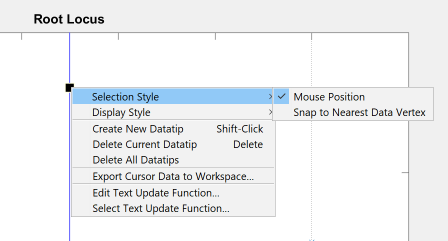


* If your root locus does not intersect the target eigenvalue, you will have to change the value for the controller zero and replot.
* From the root locus gain, calculate your controller gains $k_p$, $k_i$, and $k_{sum}$.  **Display them as outputs of your code along with the root locus plot with the target eigenvalue**. 



In [ ]:
% YOUR CODE HERE
error('No Answer Given!')

### Arduino Code Update

Beginning with the code you used for your P controller in Lab 5, make a copy of the code and add the calculation of the integral of the error and include that in your control law.

<font color = "white">.</font>
<font size = 3>
$u = k_{sum}(k_p  e + k_i \int{e})$
</font>


Since you do not have a continuous error function (your error function has values only at descrete time steps) you will need to estimate the integral numerically.  You can use the [Euler Integration](../W04A_Nonlinear_Numerical/W04A_Modeling_Nonlinear_Numerical.ipynb#Model-Validation:-Numerical-Integration) to do this.

<font color = "white">.</font>
<font size = 3>
$integral \, of \, error_{t_1} = e_1 \cdot dt$
</font>

so the integral of error at time $t_3$ 

<font color = "white">.</font>
<font size = 3>
$integral \, of \, error_{t_3}= e_1 \cdot dt_1 + e_2 \cdot dt_2 + e_3 \cdot dt_3$
</font>

Implement this algorithm after calculating the error in the ``void loop()`` function of your arduino code.  Remember to choose an appropriate [data type](../Week09_Implementation_Resources/Week09_Arduino_Resource.ipynb#Variable-Data-Types) for any variables you declare.


<font color = "blue">
Include in the cell below a copy of your completed Arduino code. Double-click on this cell to see how to properly format your code as shown below:

```c
//sample Arduino code
//properly formated for display
```

</font>

YOUR ANSWER HERE

## *Controller Validation:* 1st and 3rd Order Plant

* After modifying the arduino code and inputting your calculated gains, run the motor with the spring shaft and load in a step response test.
* Set the initial velocity to be just large enough to run the motor smoothly (Do you know why?  If not, be sure to ask!).
* Set the required step velocity being careful to check that the arduino pwm output is ***STRICTLY LESS THAN*** 5V.  If you request a voltage higher than 5V the motor will only see 5V (as that is the limit of your power supply).  This will introduce a non-linearity into your system and make your model innacurate.  

**In the code cell below, compare your predicted responses to the measured responses.  Plot the predicted feedback signal vs. measured, the predicted control signal (u) vs. measured to confirming you did not "saturate" the H-Bridge output.  Also plot the predicted velocity (both first and third order plants) vs. the measured.  Format these as 3 separete plots with the predicted and actual overlayed on the SAME plot.**

In [ ]:
% YOUR CODE HERE
error('No Answer Given!')

**In the cell below, summarize the comparison.  Comment on your expectations for the modeled closed loop behavior and the closed loop behavior you observed.  Does the dominant behavior of the real system agree with your predictions under closed loop control?  Are there any other aspects of the closed loop respose of the real system that that would lead you to the first or third order plant model in future designs?**

YOUR ANSWER HERE